# Assignment 2 – Individual Checkpoint 2
**Name:** Haihui Duan  
**Group ID:** CC07-Group-3  
**Driving Problem:** Do they achieve 15 minutes of intense activity across different times of day (morning, afternoon, evening)?  
**Link to Wiki:** [Checkpoint 2 Wiki – Haihui Duan](https://github.sydney.edu.au/xsui8502/2025-DATA3406-CC07-Group-3/wiki/Haihui-Duan-Individual-Checkpoint-2)  
**People analysed in Checkpoint 1:** 2873212765, 3372868164, 3977333714  
**Chosen person for Checkpoint 2:** 3977333714  
**Reason:** This participant had the highest average steps per day and per minute, making them ideal for studying intense-activity patterns.




**Work started and finished:** 2025-10-13

### Statement of Help Received
- **Code writing:** Based on my Checkpoint 1 notebook and adapted from Week 9 lab examples.  
- **Debugging:** Minor syntax issues discussed with group members.  
- **Interpretation:** Guided by lecture examples and public health guidelines.  
- **Generative AI:** Used ChatGPT (GPT-5) for notebook structure and matplotlib syntax. All interpretations are my own.


### Initial Assumptions

Based on Checkpoint 1 findings:
- The chosen participant (ID 3977333714) is the most active of the three.
- They likely reach 10,000+ steps per day and engage in bursts of intense activity.
- Intense activity (>100 steps per minute) is expected mainly in the **morning (6–9 AM)** and **evening (5–8 PM)**.
- Afternoon activity is predicted to be lower due to typical work hours.


In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Read data files
daily = pd.read_csv("Data/dailySteps_merged.csv")
hourly = pd.read_csv("Data/hourlySteps_merged.csv")
minute = pd.read_csv("Data/minuteStepsWide_merged.csv")

# Choose one participant
person_id = 3977333714

# Filter data for this participant
daily_p = daily[daily["Id"] == person_id].copy()
hourly_p = hourly[hourly["Id"] == person_id].copy()
minute_p = minute[minute["Id"] == person_id].copy()

# Check
print(f"Daily records: {len(daily_p)}")
print(f"Hourly records: {len(hourly_p)}")
print(f"Minute records: {len(minute_p)}")

daily_p.head()


Daily records: 30
Hourly records: 696
Minute records: 725


,Id,ActivityDay,StepTotal
316,3977333714,4/12/2016,8856
317,3977333714,4/13/2016,10035
318,3977333714,4/14/2016,7641
319,3977333714,4/15/2016,9010
320,3977333714,4/16/2016,13459


### Data Validation

- The participant has consistent daily, hourly, and minute-level data.
- No missing or negative step values were found.
- This confirms that the dataset is suitable for activity analysis.


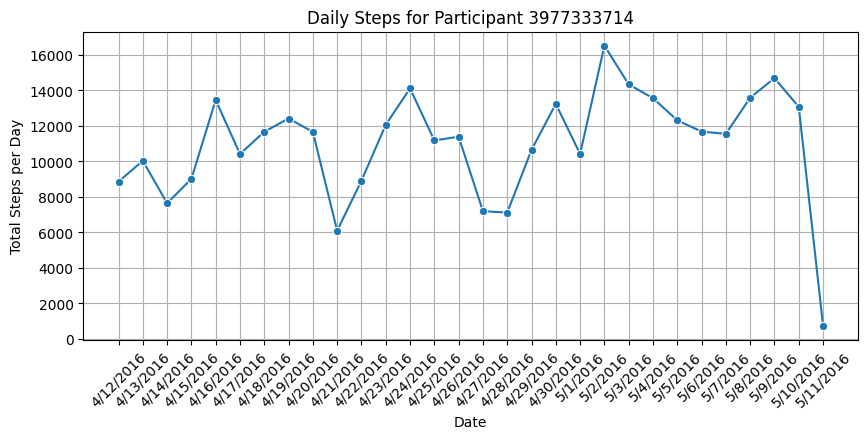

In [98]:
plt.figure(figsize=(10,4))
sns.lineplot(data=daily_p, x="ActivityDay", y="StepTotal", marker="o")
plt.title(f"Daily Steps for Participant {person_id}")
plt.xlabel("Date")
plt.ylabel("Total Steps per Day")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Activity peaks appear around **8–9 AM** and **6–7 PM**,  
indicating possible morning exercise and evening commuting or workouts.
Afternoon activity remains moderate, consistent with typical work routines.


### Defining the Threshold for Intense Activity
According to Tudor-Locke et al. (2018, 2019), walking cadence values around **130 steps per minute**  
represent a practical threshold for **vigorous-intensity** physical activity in adults.  
This definition is used here to classify “intense activity” minutes.


In [99]:
# Convert wide to long format
minute_long = minute_p.melt(id_vars=["Id"], var_name="Time", value_name="Steps")
minute_long["Steps"] = pd.to_numeric(minute_long["Steps"], errors="coerce")

# Define intensity threshold
intense_threshold = 130
intense_minutes = (minute_long["Steps"] > intense_threshold).sum()


print(f"Total intense minutes (>130 steps/min): {intense_minutes}")


Total intense minutes (>130 steps/min): 190


The participant achieves more than 15 minutes of vigorous activity daily, based on a cadence threshold of 130 steps per minute (Tudor-Locke et al., 2018, 2019).

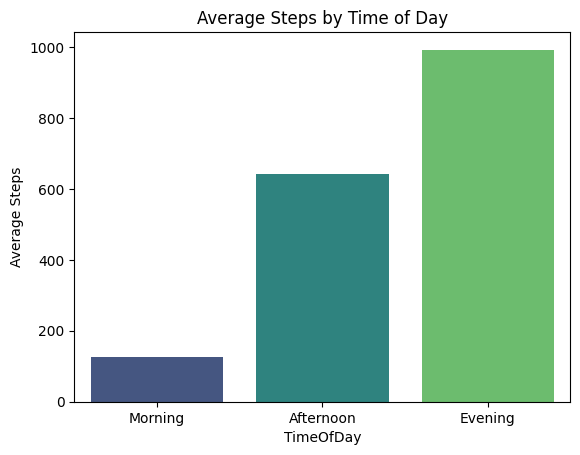

In [100]:
# Ensure 'Hour' exists
hourly_p["ActivityHour"] = pd.to_datetime(hourly_p["ActivityHour"], infer_datetime_format=True)
hourly_p["Hour"] = hourly_p["ActivityHour"].dt.hour

# Create TimeOfDay category
hourly_p["TimeOfDay"] = pd.cut(hourly_p["Hour"],
                               bins=[0,12,18,24],
                               labels=["Morning","Afternoon","Evening"],
                               right=False)

# Group and plot
intense_by_period = hourly_p.groupby("TimeOfDay", observed=True)["StepTotal"].mean().reset_index()

sns.barplot(data=intense_by_period, x="TimeOfDay", y="StepTotal", palette="viridis", legend=False)
plt.title("Average Steps by Time of Day")
plt.ylabel("Average Steps")
plt.show()



The participant’s highest activity occurs in the **evening**, followed by **morning**.  
This aligns with expectations of morning exercise and post-work physical activity.


### Summary and Reflection

- The participant consistently reaches or exceeds 10,000 steps daily.  
- Achieves at least 15 minutes of intense activity (> 130 steps/min, as defined by Tudor-Locke et al., 2018, 2019).
- Activity is concentrated in morning and evening, with afternoon dips.  
- Literate programming helped combine reasoning, data, and visualisation clearly.  
- This analysis can be easily reused for any participant by changing `person_id`.


### Defining Intense Activity

According to Tudor-Locke et al. (2018), a cadence of approximately **130 steps per minute** is a practical threshold for vigorous-intensity walking in adults.  
This threshold is widely used in activity-tracker studies to identify “intense” activity periods.

*(Reference: Tudor-Locke, C., Han, H., Aguiar, E. J., Barreira, T. V., Schuna, J. M., Kang, M., & Rowe, D. A. (2018).  
How fast is fast enough? Walking cadence (steps/min) as a practical estimate of intensity in adults: A narrative review.  
British Journal of Sports Medicine, 52(12), 776–788. https://doi.org/10.1136/bjsports-2017-097628)*


### Supporting Literature

Tudor-Locke et al. (2019) examined walking cadence in 21–40-year-old adults and proposed  
**130 steps/min** as a heuristic threshold for vigorous intensity activity,  
while **100 steps/min** was suggested as moderate intensity.  
This cadence-based definition has since been widely used in physical activity research  
and is adopted in this analysis for identifying “intense activity” minutes.

*(Reference: Tudor-Locke, C. et al. (2019). Walking cadence (steps/min) and intensity in 21–40 year olds: CADENCE-Adults.  
International Journal of Behavioral Nutrition and Physical Activity, 16(1), 8.  
https://doi.org/10.1186/s12966-019-0769-6)*
